# Análise dos Microdados do ENEM 

In [14]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt


In [7]:
# Carregar apenas as colunas relevantes
colunas_relevantes = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA',
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
    'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'
]


In [8]:
# Ler o arquivo CSV com as colunas selecionadas
microdadosEnem = pd.read_csv(
    "C:/Users/Arthur/Downloads/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv",
    sep=";", 
    encoding='ISO-8859-1',
    usecols=colunas_relevantes
)

In [9]:
# Mapeamento das faixas etárias
faixas_etarias = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

In [10]:
# Adicionar a coluna de faixa etária
microdadosEnem['Faixa Etária'] = microdadosEnem['TP_FAIXA_ETARIA'].map(faixas_etarias)


In [11]:
# Distribuição Etária Nacional
distribuicao_nacional = microdadosEnem['Faixa Etária'].value_counts().sort_index()


In [12]:
# Dados específicos de Feira de Santana
feira_santana = microdadosEnem[microdadosEnem['NO_MUNICIPIO_ESC'] == 'Feira de Santana']
distribuicao_feira = feira_santana['Faixa Etária'].value_counts().sort_index()


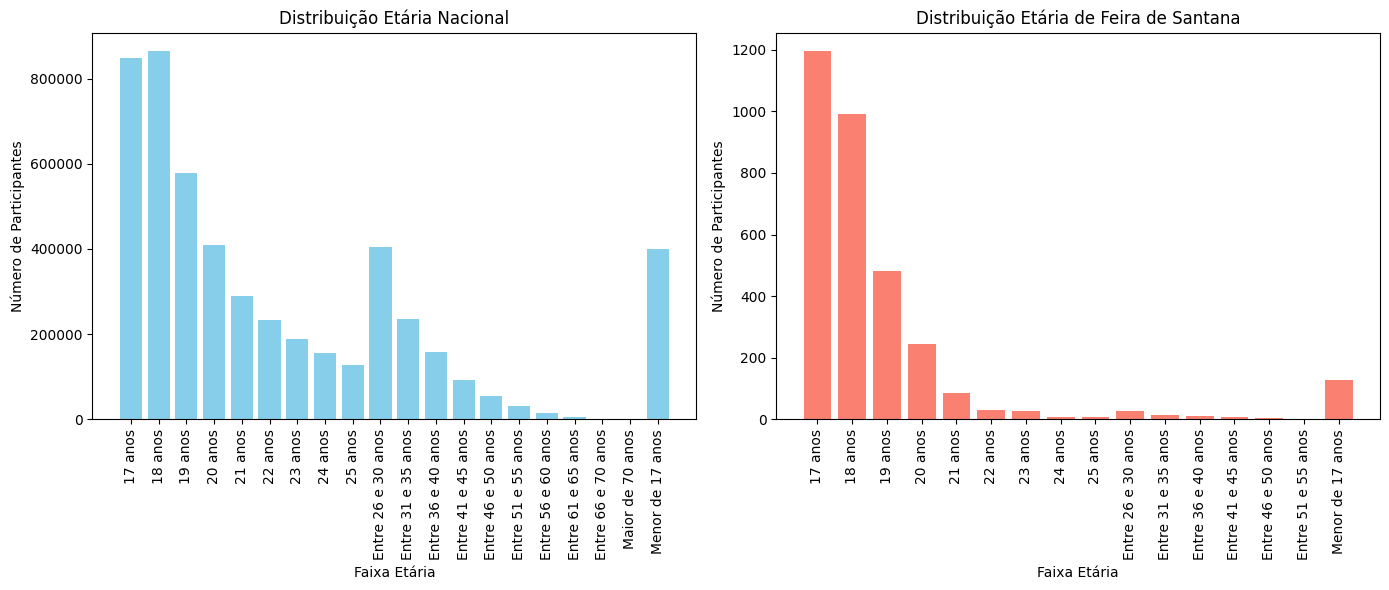

In [19]:
# Criar gráficos
plt.figure(figsize=(14, 6))

# Gráfico da Distribuição Etária Nacional
plt.subplot(1, 2, 1)
plt.bar(distribuicao_nacional.index, distribuicao_nacional.values, color='skyblue')
plt.title('Distribuição Etária Nacional')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=90)

# Gráfico da Distribuição Etária de Feira de Santana
plt.subplot(1, 2, 2)
plt.bar(distribuicao_feira.index, distribuicao_feira.values, color='salmon')
plt.title('Distribuição Etária de Feira de Santana')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [20]:
# Proporção de candidatos por gênero nacional
proporcao_nacional = microdadosEnem['TP_SEXO'].value_counts(normalize=True) * 100
proporcao_nacional.index = proporcao_nacional.index.map({'M': 'Masculino', 'F': 'Feminino'})

# Dados específicos de Feira de Santana
feira_santana = microdadosEnem[microdadosEnem['NO_MUNICIPIO_ESC'] == 'Feira de Santana']
proporcao_feira = feira_santana['TP_SEXO'].value_counts(normalize=True) * 100
proporcao_feira.index = proporcao_feira.index.map({'M': 'Masculino', 'F': 'Feminino'})


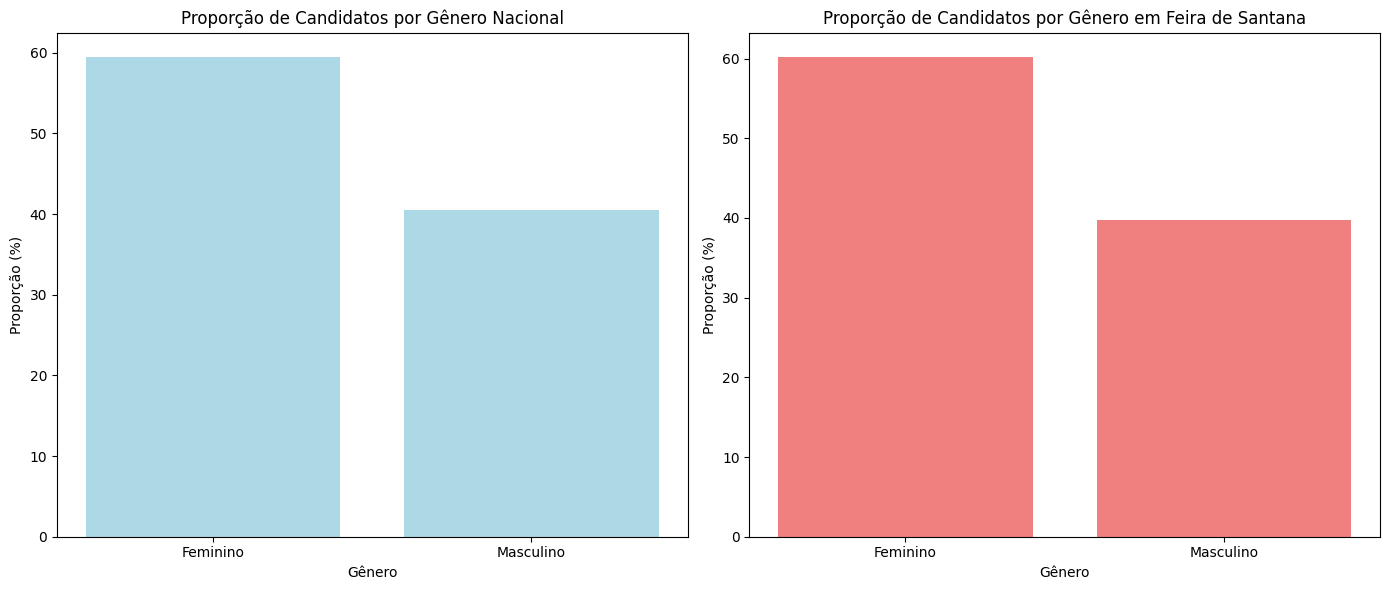

In [21]:
# Criar gráficos
plt.figure(figsize=(14, 6))

# Gráfico da Proporção de Candidatos por Gênero Nacional
plt.subplot(1, 2, 1)
plt.bar(proporcao_nacional.index, proporcao_nacional.values, color='lightblue')
plt.title('Proporção de Candidatos por Gênero Nacional')
plt.xlabel('Gênero')
plt.ylabel('Proporção (%)')

# Gráfico da Proporção de Candidatos por Gênero de Feira de Santana
plt.subplot(1, 2, 2)
plt.bar(proporcao_feira.index, proporcao_feira.values, color='lightcoral')
plt.title('Proporção de Candidatos por Gênero em Feira de Santana')
plt.xlabel('Gênero')
plt.ylabel('Proporção (%)')

plt.tight_layout()
plt.show()


In [22]:
# Filtrar os dados para escolas públicas e privadas
escolas_publicas = microdadosEnem[microdadosEnem['TP_ESCOLA'] == 2]
escolas_privadas = microdadosEnem[microdadosEnem['TP_ESCOLA'] == 3]

# Cálculo das estatísticas para escolas públicas e privadas
desempenho_publico = escolas_publicas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe()
desempenho_privado = escolas_privadas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe()


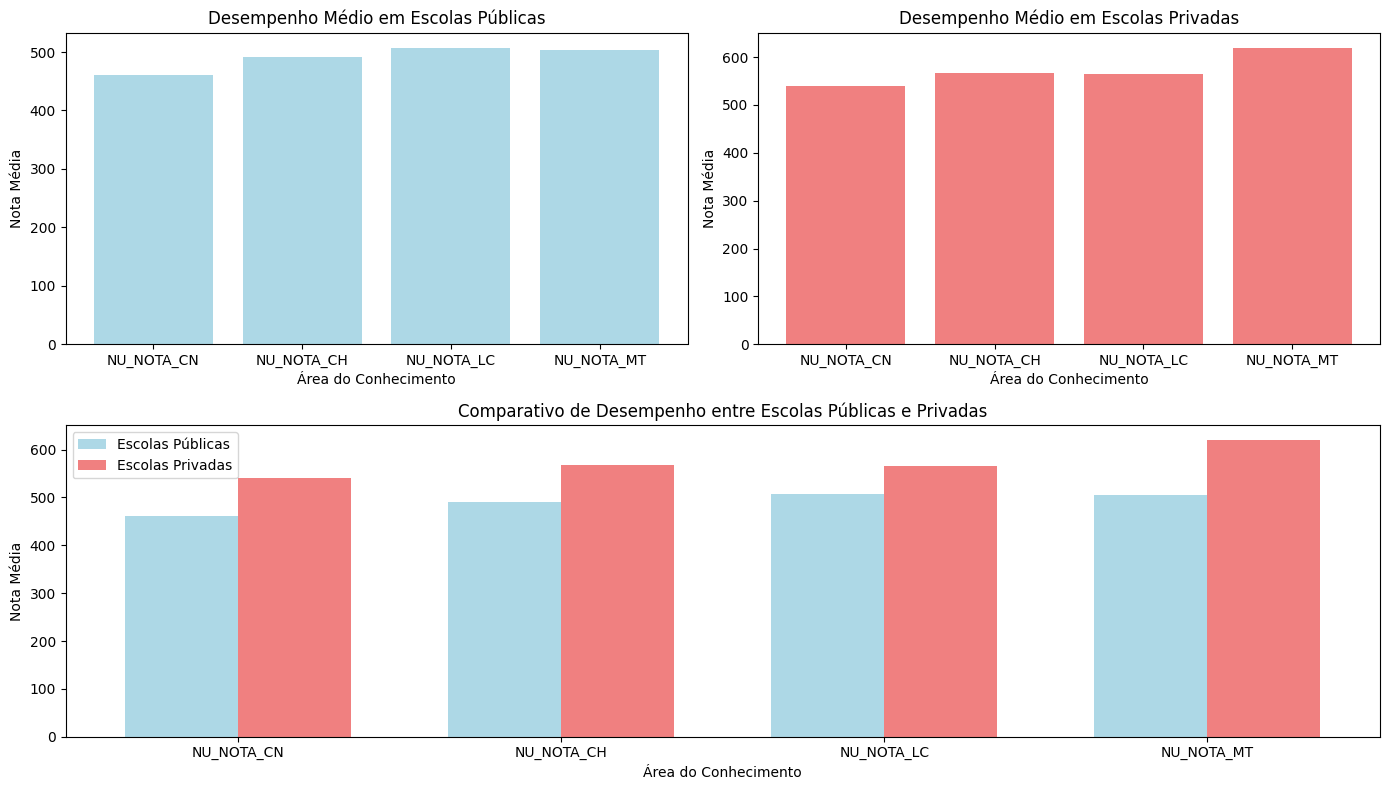

In [23]:
# Criar gráficos
plt.figure(figsize=(14, 8))

# Gráfico do Desempenho de Alunos de Escola Pública
plt.subplot(2, 2, 1)
plt.bar(desempenho_publico.columns, desempenho_publico.loc['mean'], color='lightblue')
plt.title('Desempenho Médio em Escolas Públicas')
plt.xlabel('Área do Conhecimento')
plt.ylabel('Nota Média')

# Gráfico do Desempenho de Alunos de Escola Privada
plt.subplot(2, 2, 2)
plt.bar(desempenho_privado.columns, desempenho_privado.loc['mean'], color='lightcoral')
plt.title('Desempenho Médio em Escolas Privadas')
plt.xlabel('Área do Conhecimento')
plt.ylabel('Nota Média')

# Gráfico Comparativo
plt.subplot(2, 1, 2)
width = 0.35
indices = range(len(desempenho_publico.columns))
plt.bar(indices, desempenho_publico.loc['mean'], width=width, label='Escolas Públicas', color='lightblue')
plt.bar([i + width for i in indices], desempenho_privado.loc['mean'], width=width, label='Escolas Privadas', color='lightcoral')
plt.title('Comparativo de Desempenho entre Escolas Públicas e Privadas')
plt.xlabel('Área do Conhecimento')
plt.ylabel('Nota Média')
plt.xticks([i + width / 2 for i in indices], desempenho_publico.columns)
plt.legend()

plt.tight_layout()
plt.show()
